## Final Project Submission

Please fill out:
* Student name: Eli Gerber
* Student pace: full time
* Scheduled project review date/time: February 17, 2023
* Instructor name: Joe Mata
* Blog post URL:


# Data Cleaning

In [1]:
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

pd.options.display.max_columns = None
pd.options.display.width = None

Let's start by loading our dataset.

In [62]:
# Your code here - remember to use markdown cells for comments as well!
hd = pd.read_csv('/Users/eli/Desktop/Kings-County-Real-Estate-analysis-NAEG/data/kc_house_data.csv')
hd['grade'].value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
2 Substandard        2
1 Cabin              2
Name: grade, dtype: int64

In [3]:
hd.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


There's a lot of information in here, but some of it may not be useful in its current form. It looks like the ZIP code for each listing is at the end of the address, so let's extract that to a new column.

In [4]:
hd['zip'] = hd.address.str[-20:-15]
hd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


Now that we have the ZIP code for each sale, we can make sure our dataset is limited to King County. We'll take a list of all ZIP codes for King County, locate records that do not have a ZIP code that matches any of the elements in that list, and remove those rows from our data.

In [5]:
zips=[98052,98115,98103,98092,98042,98023,98105,98003,98034,98118,98133,98058,98125,98031,98122,98033,98006,98032,98030,98004,98001,98059,98117,98056,98198,98168,98155,98027,98109,98002,98038,98144,98146,98074,98119,98007,98040,98029,98107,98011,98108,98072,98106,98178,98116,98112,98008,98053,98028,98126,98188,98102,98055,98075,98177,98022,98166,98199,98005,98121,98136,98045,98057,98019,98104,98077,98101,98065,98148,98070,98014,98354,98024,98051,98010,98047,98251,98134,98039,98195,98158,98068,98256,98288,98050,98132,98171,98184,98054,98009,98013,98015,98025,98035,98041,98062,98064,98063,98071,98073,98083,98089,98093,98111,98113,98114,98124,98127,98131,98129,98139,98138,98141,98145,98151,98154,98160,98164,98161,98165,98170,98174,98175,98181,98185,98190,98194,98191,98224,98471,98481]
zips_strings = [str(i) for i in zips]
zips = zips_strings
zips

['98052',
 '98115',
 '98103',
 '98092',
 '98042',
 '98023',
 '98105',
 '98003',
 '98034',
 '98118',
 '98133',
 '98058',
 '98125',
 '98031',
 '98122',
 '98033',
 '98006',
 '98032',
 '98030',
 '98004',
 '98001',
 '98059',
 '98117',
 '98056',
 '98198',
 '98168',
 '98155',
 '98027',
 '98109',
 '98002',
 '98038',
 '98144',
 '98146',
 '98074',
 '98119',
 '98007',
 '98040',
 '98029',
 '98107',
 '98011',
 '98108',
 '98072',
 '98106',
 '98178',
 '98116',
 '98112',
 '98008',
 '98053',
 '98028',
 '98126',
 '98188',
 '98102',
 '98055',
 '98075',
 '98177',
 '98022',
 '98166',
 '98199',
 '98005',
 '98121',
 '98136',
 '98045',
 '98057',
 '98019',
 '98104',
 '98077',
 '98101',
 '98065',
 '98148',
 '98070',
 '98014',
 '98354',
 '98024',
 '98051',
 '98010',
 '98047',
 '98251',
 '98134',
 '98039',
 '98195',
 '98158',
 '98068',
 '98256',
 '98288',
 '98050',
 '98132',
 '98171',
 '98184',
 '98054',
 '98009',
 '98013',
 '98015',
 '98025',
 '98035',
 '98041',
 '98062',
 '98064',
 '98063',
 '98071',
 '98073',


In [6]:
wrong_zip = hd.loc[~hd['zip'].isin(zips)]

In [7]:
hd.drop(index = wrong_zip.index, inplace = True, axis = 0)

In [8]:
hd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


We should also check for and remove duplicate entries. We can do so using the 'id' column, which provides us with a unique identifer for each sale.

In [9]:
hd = hd.drop_duplicates(subset = ['id'])
hd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


We can also extract the year each listing was sold.

In [10]:
hd['year_sold'] = hd.date.str[-4:].astype(int)

<ipython-input-10-d11b8781c14c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd['year_sold'] = hd.date.str[-4:].astype(int)


Now that each id is unique, we can drop that column from our data.

In [11]:
hd.drop(['id'], axis = 1, inplace = True)
hd

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip,year_sold
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,2022
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,2021
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,2021
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,2021
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103,2021
30151,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116,2021
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122,2022
30153,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055,2022


Finally, let's determine how old each house was in 2022 (the last year for which we have data).

In [12]:
hd['years_old'] = 2022 - hd['yr_built']
hd.head()

<ipython-input-12-dc2405f92bd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd['years_old'] = 2022 - hd['yr_built']


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip,year_sold,years_old
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,2022,53
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,2021,72
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,2021,66
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,2021,12
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,2021,10


# Baseline Model

Keeping in mind that our stakeholder is a family with two children moving to Seattle with an income that is roughly the median for the city (105,000 dollars), we want to limit our dataset to homes with 2 to 5 bedrooms.

In [13]:
hd = hd.loc[(2 <= hd['bedrooms']) & 5 >= hd['bedrooms']]
hd

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip,year_sold,years_old
573,5/19/2022,930000.0,0,0.0,1617,2156,3.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,2156,0,0,0,2009,0,"6019 Roosevelt Way Northeast, Seattle, Washing...",47.672700,-122.317810,98115,2022,13
1310,11/10/2021,360000.0,0,0.0,910,19000,1.0,NO,NO,NO,NONE,Average,6 Low Average,Gas,PRIVATE,910,0,0,250,1946,0,"26125 79th Avenue South, Kent, Washington 9803...",47.366765,-122.235430,98032,2021,76
1952,9/27/2021,399990.0,0,0.0,1677,43264,1.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,1677,0,0,0,1969,0,"43407 212th Avenue Southeast, Enumclaw, Washin...",47.211660,-122.059200,98022,2021,53
2044,9/17/2021,509000.0,0,1.0,400,2385,1.0,NO,NO,NO,AVERAGE,Average,6 Low Average,Electricity,PUBLIC,400,0,0,0,1946,0,"8416 B Island Dr S, Seattle, Washington 98118,...",47.528030,-122.261290,98118,2021,76
4835,1/27/2022,830000.0,0,0.0,1255,983,3.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,1672,0,0,0,2018,0,"307 North 65th Street, Seattle, Washington 981...",47.675845,-122.354885,98103,2022,4
5811,8/19/2021,13950000.0,0,1.0,290,178017,1.0,YES,NO,NO,EXCELLENT,Very Good,6 Low Average,Electricity,PUBLIC,290,0,0,160,1940,0,"5045 Forest Avenue Southeast, Mercer Island, W...",47.556910,-122.230600,98040,2021,82
7545,12/17/2021,1225000.0,0,0.0,1940,8893,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1940,0,220,210,2016,0,"7453 Gatewood Road Southwest, Seattle, Washing...",47.536140,-122.385170,98136,2021,6
8338,7/20/2021,550000.0,0,0.0,1370,8169,2.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,1370,0,480,350,1989,0,"615 Yakima Avenue South, Pacific, Washington 9...",47.258675,-122.255300,98047,2021,33
8391,11/30/2021,1625000.0,0,1.0,290,4000,1.0,NO,NO,NO,NONE,Average,7 Average,Electricity,PUBLIC,290,0,0,0,2018,0,"2308 North 41st Street, Seattle, Washington 98...",47.656915,-122.330900,98103,2021,4
8414,10/13/2021,1100000.0,0,1.0,670,27335,1.0,NO,NO,NO,AVERAGE,Average,5 Fair,NaN,PUBLIC,670,0,0,0,1983,0,"13036 Holmes Point Drive Northeast, Kirkland, ...",47.716870,-122.257710,98034,2021,39


To construct our baseline model, we'll select the continuous numeric variable that has the highest correlation with sale price.

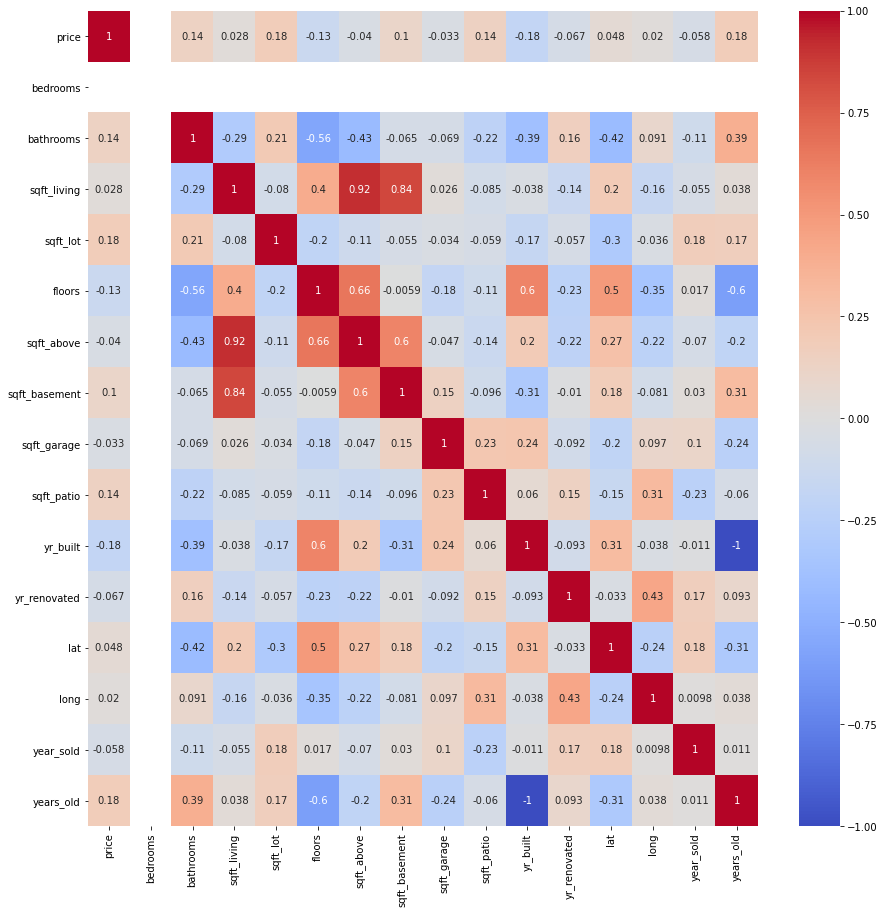

In [14]:
# create a heatmap of correlations
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(hd.corr(), annot = True, cmap = 'coolwarm');

In [15]:
# show correlations with price in an ordered list, starting with the highest correlation
price_corrs = hd.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
sqft_lot         0.181603
years_old        0.180563
yr_built         0.180563
sqft_patio       0.143964
bathrooms        0.140388
floors           0.133017
sqft_basement    0.103653
yr_renovated     0.066814
year_sold        0.058212
lat              0.047844
sqft_above       0.040455
sqft_garage      0.033261
sqft_living      0.027975
long             0.019562
bedrooms              NaN
Name: price, dtype: float64

It looks like square feet of living space has the highest correlation with sale price, which makes sense. Let's construct a simple linear regression to show that relationship.

In [16]:
# define variables for simple linear regression
y = hd['price']
X = hd.drop('price', axis = 1)

In [17]:
# separate the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# double check train-test split 
print(f"X_train is a DataFrame with {X_train.shape[0]} values")
print(f"y_train is a Series with {y_train.shape[0]} values")
print(f"X_test is a DataFrame with {X_test.shape[0]} values")
print(f"y_test is a Series with {y_test.shape[0]} values")

X_train is a DataFrame with 32 values
y_train is a Series with 32 values
X_test is a DataFrame with 11 values
y_test is a Series with 11 values


Now that we've split the data, we can create our baseline model using one of the variables.

In [18]:
# select sqft_living as predictor for baseline train and test
X_baseline_train = X_train[['sqft_living']]
X_baseline_test = X_test[['sqft_living']]

In [19]:
# instantiate the model
baseline_train_model = sm.OLS(y_train, sm.add_constant(X_baseline_train))

# fit the model and check results
baseline_train_results = baseline_train_model.fit()
baseline_train_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                   0.04202
Date:                Mon, 13 Feb 2023   Prob (F-statistic):              0.839
Time:                        16:04:00   Log-Likelihood:                -514.70
No. Observations:                  32   AIC:                             1033.
Df Residuals:                      30   BIC:                             1036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.195e+06   5.54e+05      2.156      0.039    6.32e+04    2.33e+06
sqft_living    66.9664    326.678      0.205      0.839    -600.199     734.132
==============================================================================
Omnibus:                       72.365   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              932.335
Skew:                           5.028   Prob(JB):                    3.52e-203
Kurtosis:                      27.457   Cond. No.                     2.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Dummies for Categorical Columns

In [68]:
hd['heat_source'].value_counts()

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [69]:
pd.get_dummies(hd, columns = ['waterfront', 'greenbelt', 'nuisance'], drop_first = True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,waterfront_YES,greenbelt_YES,nuisance_YES
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,0,0,0
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,0,0,1
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,0,0,0
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,0,0,0
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,0,0,0
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,0,0,0
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,0,0,1
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,0,0,0


## Removing outlier homes

Our stakeholder is interested in constructing new housing for Seattle's growing workforce, most of whom will live in market-rate housing. As such, we want to look at the middle 90% of the price distribution so that we can exclude affordable (or dilapidated) housing at one end of the spectrum, and luxury housing at the other.

In [20]:
# find the 95th percentile for our dataset
top5 = y_train.quantile(0.95)

# find the 5th percentile for our dataset
bottom5 = y_train.quantile(0.05)

#identify rows that are above the 99th percentile
# y_train_mrh = y_train.loc[bottom5 < y_train < y_train]
print(bottom5, top5)

346500.0 2500224.1



## Checking assumptions for baseline model

# Type of Housing

In [21]:
permits = pd.read_csv('/Users/eli/Desktop/Kings-County-Real-Estate-analysis-NAEG/data/Building_Permits.csv')
permits.head()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PermitNum,PermitClass,PermitClassMapped,PermitTypeMapped,PermitTypeDesc,Description,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,AppliedDate,IssuedDate,ExpiresDate,CompletedDate,StatusCurrent,RelatedMup,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,ContractorCompanyName,Link,Latitude,Longitude,Location1
0,6740358-DM,Commercial,Non-Residential,Demolition,Demolition,"Demolish commercial building, per plans",NaN,NaN,NaN,0.0,2021-02-19,2021-06-03,2024-06-03,NaN,Issued,NaN,1300 NE 45th ST,NaN,NaN,NaN,NaN,https://cosaccela.seattle.gov/portal/customize...,47.661606,-122.313942,"(47.66160647, -122.31394172)"
1,6777621-CN,Commercial,Non-Residential,Building,New,"Construct a mixed-use building, occupy per plans",NaN,NaN,NaN,17253372.0,2021-01-29,NaN,NaN,NaN,Reviews In Process,NaN,214 5TH AVE S,SEATTLE,WA,98104.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.600402,-122.327423,"(47.60040203, -122.32742349)"
2,6779555-DM,Multifamily,Residential,Demolition,NaN,"Demolish existing structures, per plan.",NaN,NaN,NaN,3000000.0,2020-12-22,2021-10-13,2023-04-13,NaN,Issued,NaN,3417 HARBOR AVE SW,SEATTLE,WA,98126.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.572339,-122.371124,"(47.57233926, -122.37112364)"
3,6804487-DM,Multifamily,Residential,Demolition,NaN,"Demolish existing structures, per plan.",1.0,1.0,0.0,1000000.0,2020-12-13,2021-01-11,2022-07-11,NaN,Expired,NaN,1122 TAYLOR AVE N,SEATTLE,WA,98109.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.629616,-122.345990,"(47.62961603, -122.34598966)"
4,6787877-DM,Multifamily,Residential,Demolition,Demolition,"Demo single-family residence, per plan.",1.0,1.0,0.0,650000.0,2020-09-09,2020-12-01,2022-06-01,NaN,Expired,NaN,4020 MIDVALE AVE N,SEATTLE,WA,98103.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.656079,-122.343292,"(47.65607922, -122.34329189)"


In [22]:
permits['lat_long'] = list(zip(permits['Latitude'].round(3), permits['Longitude'].round(3)))
permits.head()

,PermitNum,PermitClass,PermitClassMapped,PermitTypeMapped,PermitTypeDesc,Description,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,AppliedDate,IssuedDate,ExpiresDate,CompletedDate,StatusCurrent,RelatedMup,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,ContractorCompanyName,Link,Latitude,Longitude,Location1,lat_long
0,6740358-DM,Commercial,Non-Residential,Demolition,Demolition,"Demolish commercial building, per plans",NaN,NaN,NaN,0.0,2021-02-19,2021-06-03,2024-06-03,NaN,Issued,NaN,1300 NE 45th ST,NaN,NaN,NaN,NaN,https://cosaccela.seattle.gov/portal/customize...,47.661606,-122.313942,"(47.66160647, -122.31394172)","(47.662, -122.314)"
1,6777621-CN,Commercial,Non-Residential,Building,New,"Construct a mixed-use building, occupy per plans",NaN,NaN,NaN,17253372.0,2021-01-29,NaN,NaN,NaN,Reviews In Process,NaN,214 5TH AVE S,SEATTLE,WA,98104.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.600402,-122.327423,"(47.60040203, -122.32742349)","(47.6, -122.327)"
2,6779555-DM,Multifamily,Residential,Demolition,NaN,"Demolish existing structures, per plan.",NaN,NaN,NaN,3000000.0,2020-12-22,2021-10-13,2023-04-13,NaN,Issued,NaN,3417 HARBOR AVE SW,SEATTLE,WA,98126.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.572339,-122.371124,"(47.57233926, -122.37112364)","(47.572, -122.371)"
3,6804487-DM,Multifamily,Residential,Demolition,NaN,"Demolish existing structures, per plan.",1.0,1.0,0.0,1000000.0,2020-12-13,2021-01-11,2022-07-11,NaN,Expired,NaN,1122 TAYLOR AVE N,SEATTLE,WA,98109.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.629616,-122.345990,"(47.62961603, -122.34598966)","(47.63, -122.346)"
4,6787877-DM,Multifamily,Residential,Demolition,Demolition,"Demo single-family residence, per plan.",1.0,1.0,0.0,650000.0,2020-09-09,2020-12-01,2022-06-01,NaN,Expired,NaN,4020 MIDVALE AVE N,SEATTLE,WA,98103.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.656079,-122.343292,"(47.65607922, -122.34329189)","(47.656, -122.343)"


In [23]:
hd.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long', 'zip', 'year_sold', 'years_old'],
      dtype='object')

In [24]:
hd["lat_long"] = list(zip(hd['lat'].round(3), hd['long'].round(3)))
hd.head()

<ipython-input-24-fbfdd832422d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd["lat_long"] = list(zip(hd['lat'].round(3), hd['long'].round(3)))


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip,year_sold,years_old,lat_long
573,5/19/2022,930000.0,0,0.0,1617,2156,3.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,2156,0,0,0,2009,0,"6019 Roosevelt Way Northeast, Seattle, Washing...",47.672700,-122.317810,98115,2022,13,"(47.673, -122.318)"
1310,11/10/2021,360000.0,0,0.0,910,19000,1.0,NO,NO,NO,NONE,Average,6 Low Average,Gas,PRIVATE,910,0,0,250,1946,0,"26125 79th Avenue South, Kent, Washington 9803...",47.366765,-122.235430,98032,2021,76,"(47.367, -122.235)"
1952,9/27/2021,399990.0,0,0.0,1677,43264,1.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,1677,0,0,0,1969,0,"43407 212th Avenue Southeast, Enumclaw, Washin...",47.211660,-122.059200,98022,2021,53,"(47.212, -122.059)"
2044,9/17/2021,509000.0,0,1.0,400,2385,1.0,NO,NO,NO,AVERAGE,Average,6 Low Average,Electricity,PUBLIC,400,0,0,0,1946,0,"8416 B Island Dr S, Seattle, Washington 98118,...",47.528030,-122.261290,98118,2021,76,"(47.528, -122.261)"
4835,1/27/2022,830000.0,0,0.0,1255,983,3.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,1672,0,0,0,2018,0,"307 North 65th Street, Seattle, Washington 981...",47.675845,-122.354885,98103,2022,4,"(47.676, -122.355)"


In [25]:
hd_types = pd.merge(hd,permits[['PermitClass', 'lat_long']], on = 'lat_long', how='inner')
hd_types

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip,year_sold,years_old,lat_long,PermitClass
0,5/19/2022,930000.0,0,0.0,1617,2156,3.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,2156,0,0,0,2009,0,"6019 Roosevelt Way Northeast, Seattle, Washing...",47.6727,-122.31781,98115,2022,13,"(47.673, -122.318)",Commercial
1,5/19/2022,930000.0,0,0.0,1617,2156,3.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,2156,0,0,0,2009,0,"6019 Roosevelt Way Northeast, Seattle, Washing...",47.6727,-122.31781,98115,2022,13,"(47.673, -122.318)",Single Family/Duplex
2,5/19/2022,930000.0,0,0.0,1617,2156,3.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,2156,0,0,0,2009,0,"6019 Roosevelt Way Northeast, Seattle, Washing...",47.6727,-122.31781,98115,2022,13,"(47.673, -122.318)",Commercial
3,5/19/2022,930000.0,0,0.0,1617,2156,3.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,2156,0,0,0,2009,0,"6019 Roosevelt Way Northeast, Seattle, Washing...",47.6727,-122.31781,98115,2022,13,"(47.673, -122.318)",Single Family/Duplex
4,5/19/2022,930000.0,0,0.0,1617,2156,3.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,2156,0,0,0,2009,0,"6019 Roosevelt Way Northeast, Seattle, Washing...",47.6727,-122.31781,98115,2022,13,"(47.673, -122.318)",Commercial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,10/6/2021,654950.0,0,0.0,900,575,3.0,NO,NO,NO,NONE,Average,7 Average,Electricity,PUBLIC,900,0,0,230,2021,0,"1703 N 42nd St, Seattle, Washington 98103, Uni...",47.6579,-122.33681,98103,2021,1,"(47.658, -122.337)",Single Family/Duplex
320,10/6/2021,654950.0,0,0.0,900,575,3.0,NO,NO,NO,NONE,Average,7 Average,Electricity,PUBLIC,900,0,0,230,2021,0,"1703 N 42nd St, Seattle, Washington 98103, Uni...",47.6579,-122.33681,98103,2021,1,"(47.658, -122.337)",Single Family/Duplex
321,10/6/2021,654950.0,0,0.0,900,575,3.0,NO,NO,NO,NONE,Average,7 Average,Electricity,PUBLIC,900,0,0,230,2021,0,"1703 N 42nd St, Seattle, Washington 98103, Uni...",47.6579,-122.33681,98103,2021,1,"(47.658, -122.337)",Single Family/Duplex
322,10/6/2021,654950.0,0,0.0,900,575,3.0,NO,NO,NO,NONE,Average,7 Average,Electricity,PUBLIC,900,0,0,230,2021,0,"1703 N 42nd St, Seattle, Washington 98103, Uni...",47.6579,-122.33681,98103,2021,1,"(47.658, -122.337)",Single Family/Duplex


In [26]:
hd_types.drop_duplicates(subset = 'address', inplace = True)
hd_types

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip,year_sold,years_old,lat_long,PermitClass
0,5/19/2022,930000.0,0,0.0,1617,2156,3.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,2156,0,0,0,2009,0,"6019 Roosevelt Way Northeast, Seattle, Washing...",47.672700,-122.317810,98115,2022,13,"(47.673, -122.318)",Commercial
25,5/25/2022,685000.0,0,0.0,1336,888,3.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,1780,0,0,0,2009,0,"6025 Roosevelt Way Northeast, Seattle, Washing...",47.672825,-122.317685,98115,2022,13,"(47.673, -122.318)",Commercial
50,7/26/2021,900000.0,0,0.0,1768,771,3.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,2356,0,0,0,2009,0,"6029 Roosevelt Way Northeast, Seattle, Washing...",47.672820,-122.317535,98115,2021,13,"(47.673, -122.318)",Commercial
75,7/7/2021,690000.0,0,0.0,1312,739,3.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,1748,0,0,0,2009,0,"6017 Roosevelt Way Northeast, Seattle, Washing...",47.672710,-122.317745,98115,2021,13,"(47.673, -122.318)",Commercial
100,1/9/2022,939000.0,0,0.0,1768,772,3.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,2356,0,0,0,2009,0,"6011 Roosevelt Way Northeast, Seattle, Washing...",47.672705,-122.317535,98115,2022,13,"(47.673, -122.318)",Commercial
125,12/20/2021,850000.0,0,0.0,1738,2143,3.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,2316,0,0,0,2009,0,"6021 Roosevelt Way Northeast, Seattle, Washing...",47.672820,-122.317820,98115,2021,13,"(47.673, -122.318)",Commercial
150,9/17/2021,509000.0,0,1.0,400,2385,1.0,NO,NO,NO,AVERAGE,Average,6 Low Average,Electricity,PUBLIC,400,0,0,0,1946,0,"8416 B Island Dr S, Seattle, Washington 98118,...",47.528030,-122.261290,98118,2021,76,"(47.528, -122.261)",Single Family/Duplex
176,1/27/2022,830000.0,0,0.0,1255,983,3.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,1672,0,0,0,2018,0,"307 North 65th Street, Seattle, Washington 981...",47.675845,-122.354885,98103,2022,4,"(47.676, -122.355)",Multifamily
193,12/17/2021,1225000.0,0,0.0,1940,8893,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1940,0,220,210,2016,0,"7453 Gatewood Road Southwest, Seattle, Washing...",47.536140,-122.385170,98136,2021,6,"(47.536, -122.385)",Single Family/Duplex
202,11/30/2021,1625000.0,0,1.0,290,4000,1.0,NO,NO,NO,NONE,Average,7 Average,Electricity,PUBLIC,290,0,0,0,2018,0,"2308 North 41st Street, Seattle, Washington 98...",47.656915,-122.330900,98103,2021,4,"(47.657, -122.331)",Single Family/Duplex


In [27]:
hd_types['PermitClass'].value_counts()

Commercial              11
Single Family/Duplex     9
Multifamily              3
Name: PermitClass, dtype: int64

In [28]:
nonresidential = hd_types.loc[(hd_types['PermitClass'] != 'Single Family/Duplex') &
                              (hd_types['PermitClass'] != 'Multifamily')]
nonresidential

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip,year_sold,years_old,lat_long,PermitClass
0,5/19/2022,930000.0,0,0.0,1617,2156,3.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,2156,0,0,0,2009,0,"6019 Roosevelt Way Northeast, Seattle, Washing...",47.672700,-122.317810,98115,2022,13,"(47.673, -122.318)",Commercial
25,5/25/2022,685000.0,0,0.0,1336,888,3.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,1780,0,0,0,2009,0,"6025 Roosevelt Way Northeast, Seattle, Washing...",47.672825,-122.317685,98115,2022,13,"(47.673, -122.318)",Commercial
50,7/26/2021,900000.0,0,0.0,1768,771,3.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,2356,0,0,0,2009,0,"6029 Roosevelt Way Northeast, Seattle, Washing...",47.672820,-122.317535,98115,2021,13,"(47.673, -122.318)",Commercial
75,7/7/2021,690000.0,0,0.0,1312,739,3.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,1748,0,0,0,2009,0,"6017 Roosevelt Way Northeast, Seattle, Washing...",47.672710,-122.317745,98115,2021,13,"(47.673, -122.318)",Commercial
100,1/9/2022,939000.0,0,0.0,1768,772,3.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,2356,0,0,0,2009,0,"6011 Roosevelt Way Northeast, Seattle, Washing...",47.672705,-122.317535,98115,2022,13,"(47.673, -122.318)",Commercial
125,12/20/2021,850000.0,0,0.0,1738,2143,3.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,2316,0,0,0,2009,0,"6021 Roosevelt Way Northeast, Seattle, Washing...",47.672820,-122.317820,98115,2021,13,"(47.673, -122.318)",Commercial
216,9/27/2021,841000.0,0,0.0,1327,875,3.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,1768,0,0,0,2018,0,"8386 Loyal Way Northwest, Seattle, Washington ...",47.690280,-122.397820,98117,2021,4,"(47.69, -122.398)",Commercial
236,5/26/2022,700000.0,0,0.0,1215,486,3.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,1620,0,0,0,2008,0,"Northwest 85th Street, Seattle, Washington 981...",47.690480,-122.376550,98117,2022,14,"(47.69, -122.377)",Commercial
247,7/14/2021,649950.0,0,0.0,1290,715,3.0,NO,NO,YES,NONE,Average,8 Good,Gas,PUBLIC,1720,0,0,0,2006,0,"1504 Northwest 52nd Street, Seattle, Washingto...",47.666685,-122.376655,98107,2021,16,"(47.667, -122.377)",Commercial
260,12/1/2021,660000.0,0,0.0,1296,778,3.0,NO,NO,YES,NONE,Average,8 Good,Gas,PUBLIC,1728,0,0,0,2006,0,"1506 Northwest 52nd Street, Seattle, Washingto...",47.666725,-122.376660,98107,2021,16,"(47.667, -122.377)",Commercial


In [29]:
hd_types.drop(index = nonresidential.index, inplace = True, axis = 0)

In [30]:
hd_types = pd.get_dummies(hd_types, columns = ['PermitClass'])
hd_types.drop('PermitClass_Multifamily', axis = 1, inplace = True)
hd_types

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip,year_sold,years_old,lat_long,PermitClass_Single Family/Duplex
150,9/17/2021,509000.0,0,1.0,400,2385,1.0,NO,NO,NO,AVERAGE,Average,6 Low Average,Electricity,PUBLIC,400,0,0,0,1946,0,"8416 B Island Dr S, Seattle, Washington 98118,...",47.528030,-122.261290,98118,2021,76,"(47.528, -122.261)",1
176,1/27/2022,830000.0,0,0.0,1255,983,3.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,1672,0,0,0,2018,0,"307 North 65th Street, Seattle, Washington 981...",47.675845,-122.354885,98103,2022,4,"(47.676, -122.355)",0
193,12/17/2021,1225000.0,0,0.0,1940,8893,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1940,0,220,210,2016,0,"7453 Gatewood Road Southwest, Seattle, Washing...",47.536140,-122.385170,98136,2021,6,"(47.536, -122.385)",1
202,11/30/2021,1625000.0,0,1.0,290,4000,1.0,NO,NO,NO,NONE,Average,7 Average,Electricity,PUBLIC,290,0,0,0,2018,0,"2308 North 41st Street, Seattle, Washington 98...",47.656915,-122.330900,98103,2021,4,"(47.657, -122.331)",1
223,5/24/2022,1160000.0,0,1.0,260,3500,1.0,NO,NO,NO,NONE,Average,7 Average,Electricity,PUBLIC,260,0,0,0,1965,0,"2657 Northwest 59th Street, Seattle, Washingto...",47.671420,-122.392520,98107,2022,57,"(47.671, -122.393)",0
224,12/30/2021,650000.0,0,0.0,920,6837,2.0,NO,NO,YES,NONE,Average,7 Average,NaN,PUBLIC,920,0,0,130,2019,0,"5030 Southwest Admiral Way, Seattle, Washingto...",47.579550,-122.396760,98116,2021,3,"(47.58, -122.397)",1
234,8/27/2021,360000.0,0,2.0,600,2604,1.0,NO,NO,NO,NONE,Average,6 Low Average,Gas,PUBLIC,300,300,0,30,1942,1999,"1111 Southwest Kenyon Street, Seattle, Washing...",47.531755,-122.349875,98106,2021,80,"(47.532, -122.35)",1
243,9/8/2021,775000.0,0,1.0,450,9405,1.0,NO,NO,NO,AVERAGE,Poor,3 Poor,Oil,PUBLIC,450,0,0,0,1917,0,"7531 South Taft Street, Seattle, Washington 98...",47.509910,-122.239760,98178,2021,105,"(47.51, -122.24)",1
244,9/29/2021,2500000.0,0,0.0,7710,7182,2.5,NO,NO,YES,NONE,Average,8 Good,Gas,PUBLIC,5580,2569,0,0,1910,0,"1727 15th Avenue, Seattle, Washington 98122, U...",47.617285,-122.313090,98122,2021,112,"(47.617, -122.313)",1
273,7/21/2021,800000.0,0,0.0,1455,646,3.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1940,0,0,0,2016,0,"6312A 32nd Ave NW, Seattle, Washington 98107, ...",47.674970,-122.398250,98107,2021,6,"(47.675, -122.398)",1


In [31]:
y = hd_types['price']
X_hd_types = hd_types[['sqft_living', 'PermitClass_Single Family/Duplex']]

hd_types_model = sm.OLS(y, sm.add_constant(X_hd_types))
hd_types_results = hd_types_model.fit()
hd_types_results.summary()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     7.024
Date:                Mon, 13 Feb 2023   Prob (F-statistic):             0.0145
Time:                        16:04:01   Log-Likelihood:                -170.16
No. Observations:                  12   AIC:                             346.3
Df Residuals:                       9   BIC:                             347.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             7.043e+05   2.37e+05      2.970      0.016    1.68e+05    1.24e+06
sqft_living                        220.2730     59.560      3.698      0.005      85.539     355.007
PermitClass_Single Family/Duplex -3434.3369   2.72e+05     -0.013      0.990   -6.19e+05    6.12e+05
==============================================================================
Omnibus:                        5.446   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                2.425
Skew:                           1.055   Prob(JB):                        0.297
Kurtosis:                       3.628   Cond. No.                     7.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Recursive Feature Elimination

In [32]:
hd_types.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip,year_sold,years_old,lat_long,PermitClass_Single Family/Duplex
150,9/17/2021,509000.0,0,1.0,400,2385,1.0,NO,NO,NO,AVERAGE,Average,6 Low Average,Electricity,PUBLIC,400,0,0,0,1946,0,"8416 B Island Dr S, Seattle, Washington 98118,...",47.528030,-122.261290,98118,2021,76,"(47.528, -122.261)",1
176,1/27/2022,830000.0,0,0.0,1255,983,3.0,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,1672,0,0,0,2018,0,"307 North 65th Street, Seattle, Washington 981...",47.675845,-122.354885,98103,2022,4,"(47.676, -122.355)",0
193,12/17/2021,1225000.0,0,0.0,1940,8893,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1940,0,220,210,2016,0,"7453 Gatewood Road Southwest, Seattle, Washing...",47.536140,-122.385170,98136,2021,6,"(47.536, -122.385)",1
202,11/30/2021,1625000.0,0,1.0,290,4000,1.0,NO,NO,NO,NONE,Average,7 Average,Electricity,PUBLIC,290,0,0,0,2018,0,"2308 North 41st Street, Seattle, Washington 98...",47.656915,-122.330900,98103,2021,4,"(47.657, -122.331)",1
223,5/24/2022,1160000.0,0,1.0,260,3500,1.0,NO,NO,NO,NONE,Average,7 Average,Electricity,PUBLIC,260,0,0,0,1965,0,"2657 Northwest 59th Street, Seattle, Washingto...",47.671420,-122.392520,98107,2022,57,"(47.671, -122.393)",0


In [55]:
hd_types_continuous = hd_types[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', \
                                'floors', \
                                'year_sold', 'years_old']]
hd_types_continuous

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,year_sold,years_old
150,509000.0,0,1.0,400,2385,1.0,2021,76
176,830000.0,0,0.0,1255,983,3.0,2022,4
193,1225000.0,0,0.0,1940,8893,2.0,2021,6
202,1625000.0,0,1.0,290,4000,1.0,2021,4
223,1160000.0,0,1.0,260,3500,1.0,2022,57
224,650000.0,0,0.0,920,6837,2.0,2021,3
234,360000.0,0,2.0,600,2604,1.0,2021,80
243,775000.0,0,1.0,450,9405,1.0,2021,105
244,2500000.0,0,0.0,7710,7182,2.5,2021,112
273,800000.0,0,0.0,1455,646,3.0,2021,6


In [56]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=3)

In [57]:
ss = StandardScaler()
ss.fit(hd_types_continuous.drop(['price'], axis=1))

hd_types_scaled = ss.transform(hd_types_continuous.drop(['price'], axis=1))

In [58]:
select.fit(X = hd_types_scaled, y = hd_types['price'])

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [59]:
select.ranking_

array([5, 2, 1, 4, 1, 3, 1])

In [60]:
hd_types_continuous.drop('price', axis=1).columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'year_sold', 'years_old'],
      dtype='object')

In [47]:
X_rfe = hd_types[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above']]
y = hd_types['price']

X_rfe

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above
150,0,1.0,400,2385,400
176,0,0.0,1255,983,1672
193,0,0.0,1940,8893,1940
202,0,1.0,290,4000,290
223,0,1.0,260,3500,260
224,0,0.0,920,6837,920
234,0,2.0,600,2604,300
243,0,1.0,450,9405,450
244,0,0.0,7710,7182,5580
273,0,0.0,1455,646,1940


In [48]:
rfe_model = sm.OLS(y, sm.add_constant(X_rfe))
rfe_results = rfe_model.fit()
rfe_results.summary()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     3.151
Date:                Mon, 13 Feb 2023   Prob (F-statistic):             0.0884
Time:                        16:05:04   Log-Likelihood:                -169.62
No. Observations:                  12   AIC:                             349.2
Df Residuals:                       7   BIC:                             351.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         7.27e+05   5.32e+05      1.367      0.214    -5.3e+05    1.98e+06
bedrooms     1.803e-07   2.05e-07      0.879      0.409   -3.05e-07    6.65e-07
bathrooms   -6.627e+04   3.55e+05     -0.187      0.857   -9.06e+05    7.74e+05
sqft_living   382.0727    476.886      0.801      0.449    -745.584    1509.730
sqft_lot       24.8878     46.574      0.534      0.610     -85.242     135.017
sqft_above   -254.2408    703.446     -0.361      0.728   -1917.627    1409.146
==============================================================================
Omnibus:                        5.535   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                2.364
Skew:                           1.017   Prob(JB):                        0.307
Kurtosis:                       3.768   Cond. No.                     1.06e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.42e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""